# Linear Model

In [1]:
# Add stock ticker and dates

ticker = ['GOOGL']
start = (2010,1,1)
end = (2023,12,31)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pandas_datareader import data, wb
import yfinance  as yf
yf.pdr_override()

from datetime import date as date
import datetime as dt

In [3]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn import metrics

In [5]:
start = dt.datetime(*start)
end = dt.datetime(*end)
today = date.today()

In [6]:
stock = pd.DataFrame(data.get_data_yahoo(ticker, start))
stock.reset_index(inplace=True)
stock.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [7]:
# To Check if data has null value
stock.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3596 entries, 0 to 3595
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3596 non-null   datetime64[ns]
 1   Open       3596 non-null   float64       
 2   High       3596 non-null   float64       
 3   Low        3596 non-null   float64       
 4   Close      3596 non-null   float64       
 5   Adj Close  3596 non-null   float64       
 6   Volume     3596 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 196.8 KB


In [9]:
print (f'Dataframe contains stock prices betwen: {stock.Date.min()} ~ {stock.Date.max()}')
print(f'Total trading days: {stock["Date"].count()} days')

Dataframe contains stock prices betwen: 2010-01-04 00:00:00 ~ 2024-04-17 00:00:00
Total trading days: 3596 days


In [10]:
stock.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3596,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3.596000e+03
mean,2017-02-22 16:29:05.939933440,55.956853,56.536517,55.389625,55.978009,55.978009,5.765098e+07
min,2010-01-04 00:00:00,10.968719,11.068068,10.851602,10.912663,10.912663,9.312000e+06
25%,2013-07-30 18:00:00,22.138827,22.257569,21.976101,22.128441,22.128441,2.812700e+07
50%,2017-02-23 12:00:00,42.080999,42.315500,41.940750,42.165001,42.165001,3.901500e+07
75%,2020-09-18 18:00:00,77.149250,78.467251,76.057629,77.263250,77.263250,7.570319e+07
max,2024-04-17 00:00:00,158.860001,160.220001,157.139999,159.410004,159.410004,5.923990e+08
std,NaN,40.787889,41.264158,40.347605,40.816165,40.816165,4.811837e+07


<Axes: >

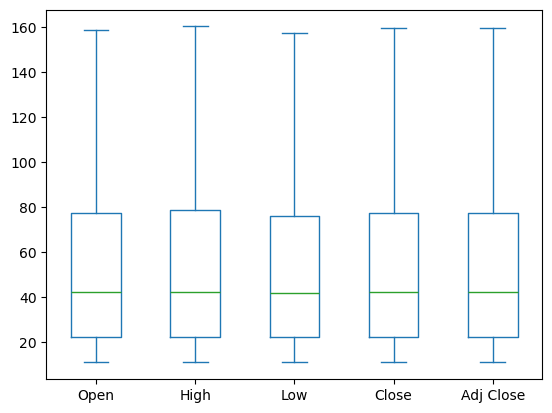

In [11]:
# Box Plot to check the outliers
stock[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

C:\Users\teddy\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



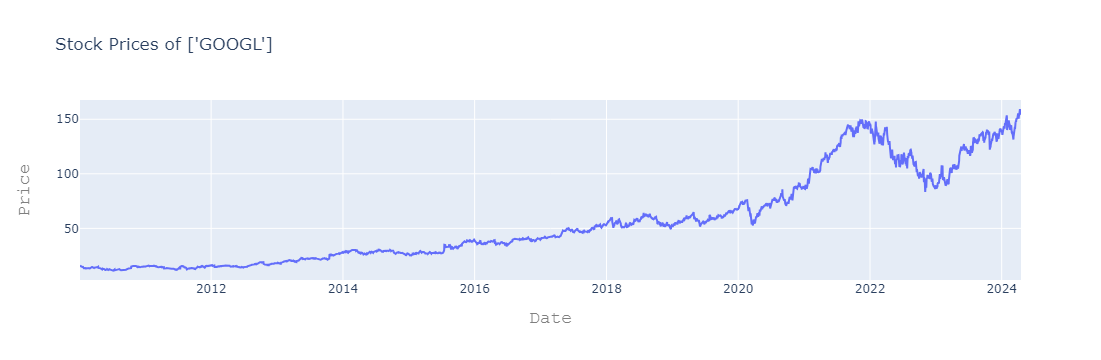

In [12]:
layout = go.Layout(
    title = f'Stock Prices of {ticker}',
    xaxis = dict(
        title = 'Date', 
        titlefont = dict(family = 'Courier New, monospace', size=18, color='#7f7f7f')),
    yaxis = dict(
        title = 'Price', 
        titlefont = dict(family = 'Courier New, monospace', size=18, color='#7f7f7f'))
)

stock_data = [{'x': stock['Date'], 'y': stock['Adj Close']}]
plot = go.Figure (data=stock_data, layout= layout)

iplot(plot)

In [13]:
# Split
X = np.array(stock.index).reshape(-1,1)
y = stock['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
# Fit & Train
scaler = StandardScaler().fit(X_train)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

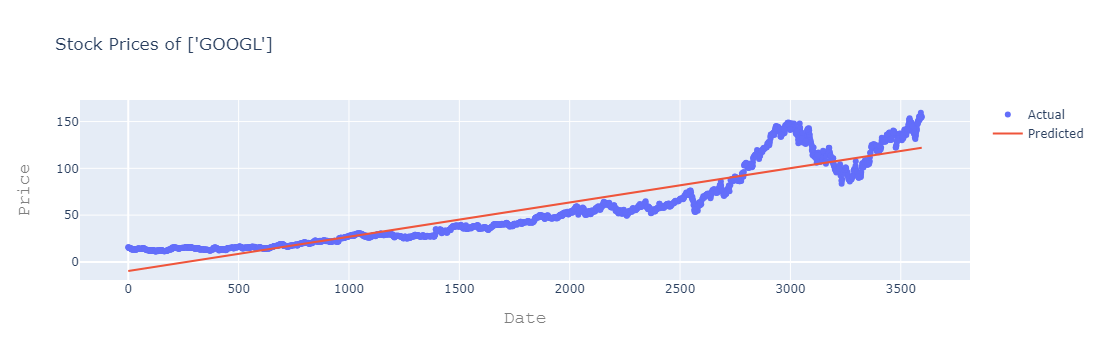

In [15]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = y_train,
    mode = 'markers', name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict (X_train).T,
    mode = 'lines', name = 'Predicted'
)

predicted_data = [trace0, trace1]
plot2 = go.Figure(data=predicted_data, layout=layout)

iplot(plot2)

In [16]:
scores = f'''
{'Metrics'.ljust(10)} {'Train'.center(20)} {'Test'.center(20)}
{'r2_score'.ljust(10)} {r2_score(y_train, lm.predict(X_train))}\t{r2_score(y_test, lm.predict(X_test))}
{'MSE'. ljust (10)} {mse(y_train, lm.predict(X_train))}\t{mse(y_test, lm.predict(X_test))}
'''
print(scores)


Metrics           Train                 Test        
r2_score   0.8542194281124499	0.8504518037484021
MSE        247.79175083329204	236.8431917082595



In [17]:
predictions = lm.predict(X_test)
print ('Variance Score', metrics.explained_variance_score(y_test, predictions))
print ('MAE', metrics.mean_absolute_error(y_test, predictions))
print ('MSE', metrics.mean_squared_error(y_test, predictions))
print ('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Variance Score 0.8505579131276033
MAE 12.483595122364447
MSE 236.8431917082595
RMSE 15.389710579093405


C:\Users\teddy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



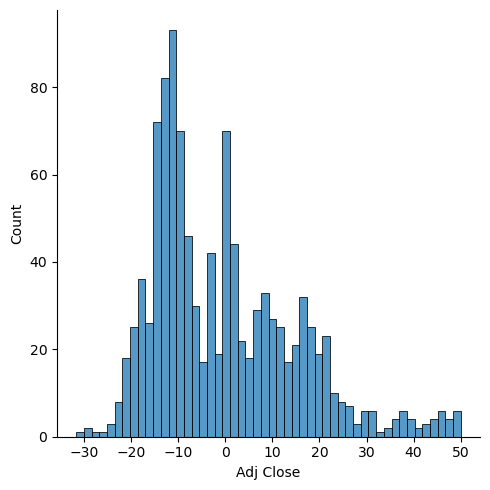

In [18]:
sns.displot(y_test-predictions, bins=50)

In [19]:
# Predict Stock Price for the next 20 days

next_20_days = pd.date_range(today, periods=20)
next_20_days_index = np.array(range(len(stock), len(stock) + 20)).reshape(-1, 1)
next_20_days_predictions = lm.predict(next_20_days_index)

predicted_dates = pd.DataFrame({'Date': next_20_days, 'Predicted_Price': next_20_days_predictions})
print(predicted_dates)

         Date  Predicted_Price
0  2024-04-18       121.953854
1  2024-04-19       121.990469
2  2024-04-20       122.027085
3  2024-04-21       122.063700
4  2024-04-22       122.100315
5  2024-04-23       122.136931
6  2024-04-24       122.173546
7  2024-04-25       122.210162
8  2024-04-26       122.246777
9  2024-04-27       122.283393
10 2024-04-28       122.320008
11 2024-04-29       122.356623
12 2024-04-30       122.393239
13 2024-05-01       122.429854
14 2024-05-02       122.466470
15 2024-05-03       122.503085
16 2024-05-04       122.539701
17 2024-05-05       122.576316
18 2024-05-06       122.612931
19 2024-05-07       122.649547
